<a href="https://colab.research.google.com/github/r2klabs/CS430Repository/blob/main/MachineLearningAssignmentTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment 3   
# Kadin McWilliams
# CS 430
# Machine Learning in the Cloud

## Standard Imports

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [41]:
from sklearn.svm import SVC, SVR
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

## Imports for Splitting Data and Building Pipeline


In [42]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [44]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [45]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## SVC Classification Problem

### Reading the Data

In [46]:
#loading banknote data into data frame
df = pd.read_csv('/content/gdrive/MyDrive/CS 430/MLA/MLA 3/banknote_authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Statistical and Visual Exploration

In [47]:
# Summarizing the numerical columns
df.describe()

,variance,skewness,curtosis,entropy,forgery
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [48]:
# Getting the counts of forgery vs no forgery
forgery_counts = df['forgery'].value_counts()

# Saving into a DataFrame
counts_df = pd.DataFrame({'forgery': forgery_counts.index, 'Count': forgery_counts.values})
print(counts_df)

   forgery  Count
0        0    762
1        1    610


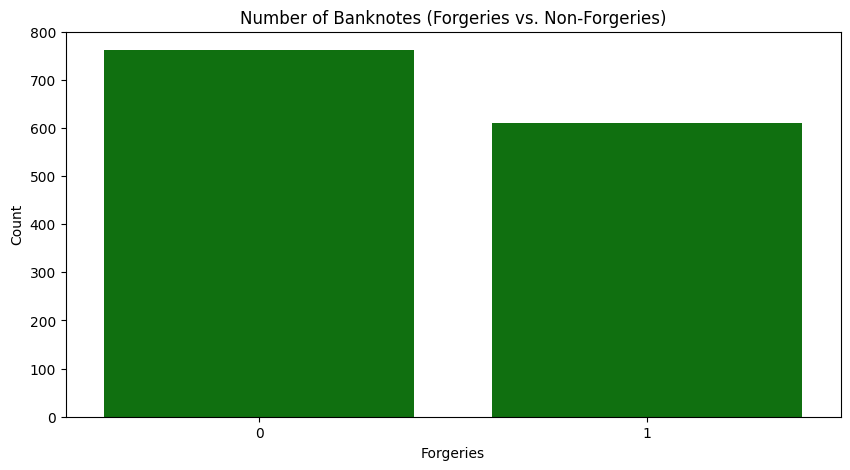

In [49]:
# Create a barplot to view how many banknotes are forgeries and how many are not. The size of the plot should 10 x 5
plt.figure(figsize=(10, 5))
sns.barplot(x='forgery', y='Count', data=counts_df, color='green')
plt.title('Number of Banknotes (Forgeries vs. Non-Forgeries)')
plt.xlabel('Forgeries')
plt.ylabel('Count')
plt.show()

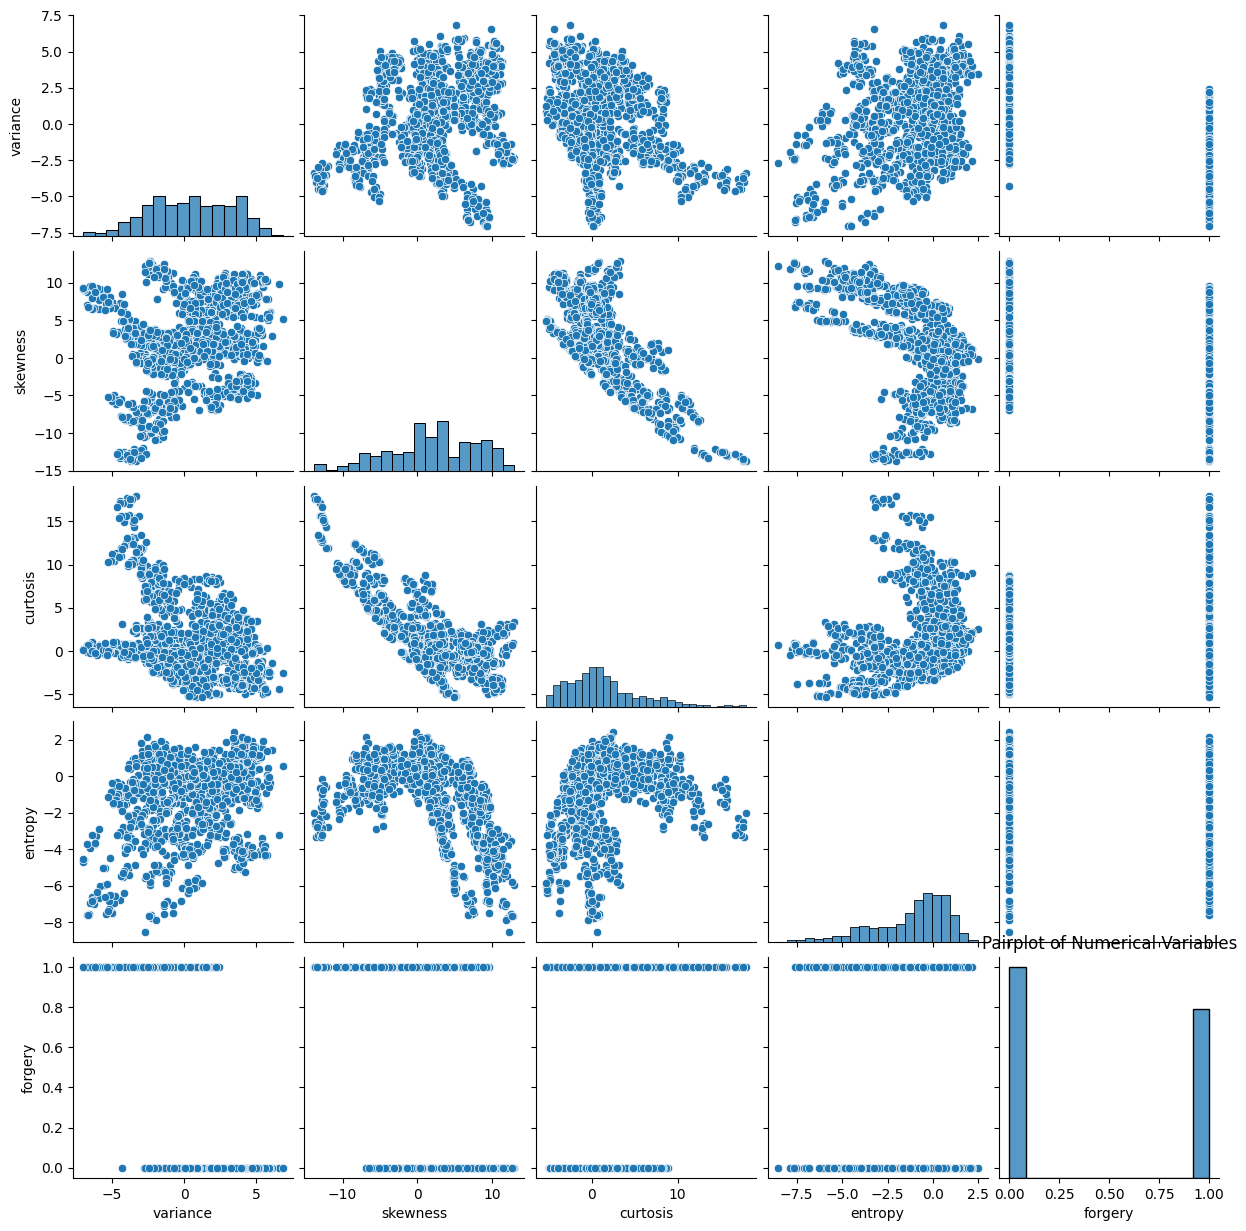

In [50]:
# Create a pairplot of all of the numerical variables using Seaborn.
sns.pairplot(df)
plt.title('Pairplot of Numerical Variables')
plt.show()

## Interesting Patterns Observed
### When looking at the pair plot there are a few relationships that look interesting. There seems to be a positive relationship between variance and entropy. For the negative relationships, both variance and skewness have a negative correlation with curtosis.

### Splitting Data into Train/Test

In [51]:
# Create a data frame called X of your inputs that includes all columns except date and forgery.
X = df.drop(['forgery'], axis=1)
X.head()
# Create a data frame called y of your output that includes only forgery This will be your target variable that you are trying to predict.
y = df['forgery']
y.head()

,forgery
0,0
1,0
2,0
3,0
4,0


In [52]:
# Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [53]:
#Create a column transformer that will MinMax scale the numerical variables

numerical_features = X.select_dtypes(include=['number']).columns.tolist()

ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features)
    ], remainder='passthrough')

In [54]:
# Create a pipeline that will transform the data and then run a SVC Classification using the linear kernel
pipeline = Pipeline([
    ('transformer', ct),
    ('svc', SVC(kernel='linear'))
])

### Executing the Model

In [55]:
# Fitting the pipeline to the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('svc', SVC(kernel='linear'))])

### Evaluating Model

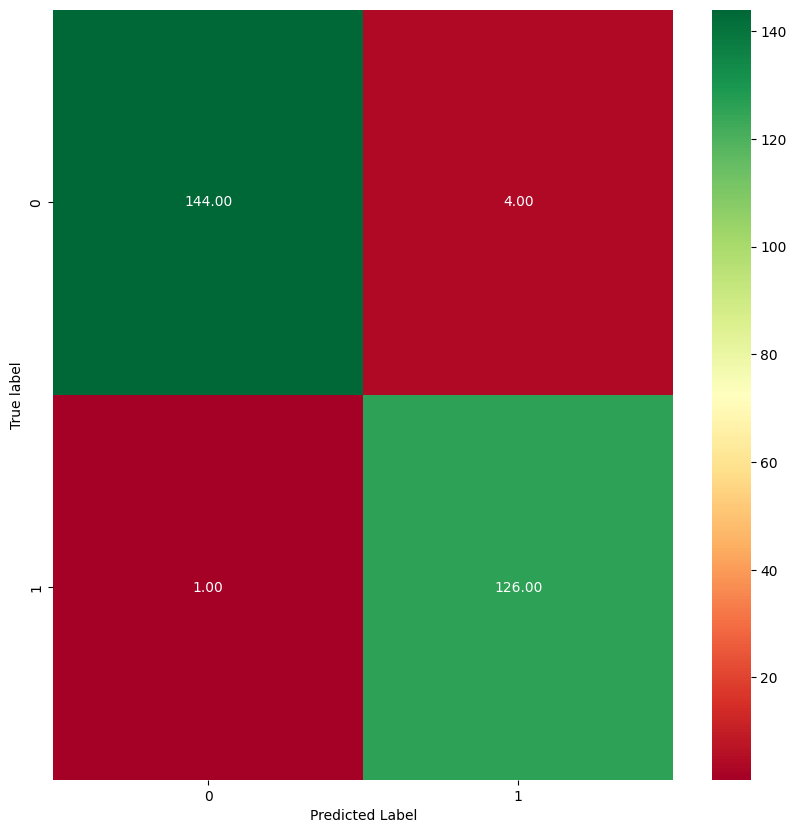

In [56]:
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Call the plot_cm function to generate the confusion matrix.
plot_cm(y_test, y_pred)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.99      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



## Interpretation of Results
### This model made very few erros and has an overall f1-score of 0.98 which is a really good f1 score meaning that this model is going to accurately predict the correct outcome most of the time. There were only 5 errors total in the confusion matrix and the most common type of error is a type 1 errors.

### Conclusion
I think that this model will work very well for predicting if a banknote is forgery or not. There was only 1 false negative in the confusion matrix meaning that out of 1372 banknotes only one that was forged got through. I would definitely use and reccomend this model for use of prediciting if a bank note is forged or not.

## SVM Regression Problem


### Reading the Data

In [58]:
df = pd.read_csv('/content/gdrive/MyDrive/CS 430/MLA/MLA 3/Steel_industry_data (1).csv')
df.head()
#getting column names
oldcol = df.columns
oldcol
newcol = ['date', 'usage_kwh', 'lag_react_pwr_kvarh',
       'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm',
       'week_status', 'day_of_week', 'load_type']
#renaming columns
df.columns = newcol
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


### Splitting Data into Train/Test

In [59]:
# Creating X variable
X = df.drop(['date', 'usage_kwh'], axis=1)
# Creating y varibale
y = df['usage_kwh']
#print(X.head())
#print(y.head())

#creating testing and training variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [60]:
# Create a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables (not the output)

# creating numerical and catagorical variables
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', MinMaxScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Creating pipline for SVM Regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

### Executing the Model

In [62]:
# Run the pipeline to fit the SVC Classification model.
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['week_status', 'day_of_week', 'load_type'], dtype='object'))])),
                ('regressor', SVR())])

### Evaluating Model

In [63]:
# Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.
y_pred = pipeline.predict(X_test)

In [66]:
# Calculate the root mean squared error for both train and test.
train_rmse = mean_squared_error(y_train, pipeline.predict(X_train), squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 4.726711080279754
Test RMSE: 4.323625833374286


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### RMSE Interpertation
This model has really low RMSE for both train and test varibales. This means that the KWH usage is only going to be off by approximately 5 KWH which is not a large margin of error.

### Conclusion
Since when using this model the RMSE score means that your KWH usage is only going to be off by approximately 5 KWH I would say that this would be a good model to use. This is an insignifigant amount to be off by and would be useful for predicting how much KWH is going to happen.